In [28]:
# Importing training data
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import math
from math import exp, expm1, log, sqrt
from collections import Counter

original_data_train = pd.read_csv('train.csv') 
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
#data_train['Expectation']=1.1*data_train['SalePrice']
#data_train.head(3) 

In [23]:
# Calculate RMSLE

def RMSLE(a, b):
    return np.sqrt(np.square(np.log(a) - np.log(b)).mean())

In [24]:
# Find correlations with the target and sort
correlations = data_train.corr()['SalePrice'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(38))
# 38 numerical variables including SalePrice

Most Positive Correlations:
 EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Expectation      1.000000
SalePrice

In [26]:
# Regression with highest correlated variables

#print(data_train['Expectation'].corr(data_train['SalePrice']))

data_train = pd.read_csv('train.csv')
for col in data_train:
    if (isinstance(data_train.iloc[1][col], (np.int64, int)) and 
       data_train[col].corr(data_train['SalePrice']) > 0.27):
        pass
        #print(data_train[col].corr(data_train['SalePrice']))
    else:
        data_train = data_train.drop(col, 1)

#data_train['Expectation'] = 100 + data_train['SalePrice']

data_matrix = data_train.values

ExpArr = data_train['SalePrice']

corrArr = data_train.corr()['SalePrice']#.drop('Expectation', 0)
corrArr = corrArr.values
print(data_train.head(0))
print(corrArr.round(3))
print(data_matrix)
print(np.multiply(corrArr, data_matrix).astype(np.int32))

#print(ExpArr)
#arrFloats = data_train.pivot('GrLivArea', 'GarageArea', 'FullBath').fillna(0).astype(int).values
#print (arrFloats)

Empty DataFrame
Columns: [OverallQual, YearBuilt, YearRemodAdd, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, HalfBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, SalePrice]
Index: []
[0.791 0.523 0.507 0.386 0.614 0.606 0.319 0.709 0.561 0.284 0.534 0.467
 0.64  0.623 0.324 0.316 1.   ]
[[     7   2003   2003 ...      0     61 208500]
 [     6   1976   1976 ...    298      0 181500]
 [     7   2001   2002 ...      0     42 223500]
 ...
 [     7   1941   2006 ...      0     60 266500]
 [     5   1950   1996 ...    366      0 142125]
 [     5   1965   1965 ...    736     68 147500]]
[[     5   1047   1015 ...      0     19 208500]
 [     4   1033   1002 ...     96      0 181500]
 [     5   1046   1015 ...      0     13 223500]
 ...
 [     5   1014   1017 ...      0     18 266500]
 [     3   1019   1012 ...    118      0 142125]
 [     3   1027    996 ...    238     21 147500]]


In [27]:
# assigning relative values for correlations
max = 0;
for i in corrArr:
    max += i
#print(max)
for i in corrArr:
    i = i / max
    print(i.round(4), end=' ')

0.0859 0.0568 0.0551 0.042 0.0667 0.0658 0.0347 0.077 0.0609 0.0309 0.058 0.0507 0.0696 0.0677 0.0352 0.0343 0.1086 

In [29]:
qualPrices = np.zeros(shape=(10,1460), dtype=np.int32)
qualPricesEntries = np.zeros(10)
temp = 0;
for i in range(0,1460):
    temp = data_train['OverallQual'][i] - 1
    qualPricesEntries[temp] += 1
    qualPrices[temp][int(qualPricesEntries[temp]-1)] = data_train['SalePrice'][i]
       
print(qualPricesEntries)
print(qualPrices[2][0:int(qualPricesEntries[2])])
print(np.mean(qualPrices[2][0:int(qualPricesEntries[2])]))
np.delete(qualPrices, 10)
np.delete(qualPricesEntries, 9)

[  2.   3.  20. 116. 397. 374. 319. 168.  43.  18.]
[107400  85000  76500 126175  87500 120000  67000  52000  93500  37900
  91000  82000 139600  81000  92900  95000  72500  79000  58500 105000]
87473.75


array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.])

In [30]:
# Initializes the quality price mean array

QPM = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,10):
    QPM[i] = round(np.mean(qualPrices[i][0:int(qualPricesEntries[i])]),2)
    
print(QPM)

[50150.0, 51770.33, 87473.75, 108420.66, 133523.35, 161603.03, 207716.42, 274735.54, 367513.02, 438588.39]


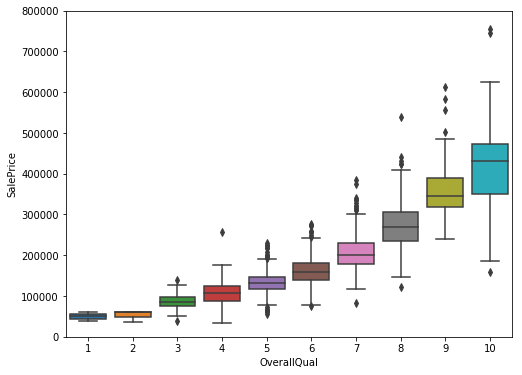

In [31]:
#box plot overallqual/saleprice
import matplotlib.pyplot as plt
import seaborn as sns
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [32]:
y = pd.Series([QPM[0],QPM[1],QPM[2],QPM[3],QPM[4],QPM[5],QPM[6],QPM[7],QPM[8],QPM[9]], index=range(1,11))

In [33]:
# Make submission .csv file from ExpArr

import csv
submission = pd.DataFrame(data={'Id': [], 'SalePrice': []})

submission['Id'] = range(1461,2920)
submission['SalePrice'] = ExpArr
    
print(submission.head(5))
submission.to_csv("sample_submission.csv", index=False)

     Id  SalePrice
0  1461     208500
1  1462     181500
2  1463     223500
3  1464     140000
4  1465     250000


In [34]:
#bivariate analysis saleprice/grlivarea

var = 'TotalBsmtSF'
#data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
#fig, ax = plt.subplots(figsize=(15,6))
#data.plot.scatter(ax=ax, x=var, y='SalePrice', ylim=(0,800000), xlim=(-200,3500));
print(np.polyfit(data_train[var], data_train['SalePrice'], 1))
print(np.polyfit(data_train[data_train[var] > 0][var], data_train[data_train[var] > 0]['SalePrice'], 1))

[  111.10960369 63430.62854551]
[  118.22039994 54618.1161001 ]


In [35]:
#  BrkTil  CBlock  PConc  Slab  Stone  Wood
data_train = pd.read_csv('train.csv')
NeighborhoodOHE = pd.get_dummies(data_train['Neighborhood'].reset_index(drop=True))
FoundationOHE = pd.get_dummies(data_train['Foundation'].reset_index(drop=True))

Found_len = [146, 634, 647, 24, 6, 3] # Amount of each foundation type
FPM = [0,0,0,0,0,0]
for i in range(0, 6):
    FPM[i] = FoundationOHE.T.values[i].dot(data_train['SalePrice'])/Found_len[i]

print(RMSLE(data_train['SalePrice'], np.matmul(FoundationOHE,FPM)))
print(RMSLE(data_train['SalePrice'], data_train['OverallQual'].map(y)))


0.3381327289830023
0.22970674889842582


In [36]:
# Normalizing TotalBsmtSF
BPArr = data_train['TotalBsmtSF']

zeroSFBasementAve = np.mean(data_train[data_train['TotalBsmtSF'] == 0]['SalePrice'])

def basementSizeToPrice(x):
    if np.equal(x, 0):
        return zeroSFBasementAve
    else:
        return 118.22039994*x+54618.1161001
basementSizeToPrice = np.vectorize(basementSizeToPrice)

In [42]:
# put together normalized value matrix here
  # note we can use a matrix for our regression instead 
  # of an array/vector since then we can account for low
  # corr of wood foundation or overall quality 1/10 etc


NVM = np.stack((np.matmul(FoundationOHE,FPM), 
                data_train['OverallQual'].map(y),
                basementSizeToPrice(data_train['TotalBsmtSF']),
                AreaNormalizedArr,
                PWWII),
               axis=0)

# Foundation | Overall Quality | Basement Size | Area -tb continued
print(NVM)

# Actual code for finding ExpArr (expected sale price array)

#np.mean(qualPrices[2][0:int(qualPricesEntries[2])])

ExpArr = data_test['OverallQual'].map(y)

[[225230.44204019 149805.71451104 225230.44204019 ... 165959.16666667
  149805.71451104 149805.71451104]
 [207716.42       161603.03       207716.42       ... 207716.42
  133523.35       133523.35      ]
 [155814.77844874 203812.26082438 163380.8840449  ... 190808.01683098
  182059.70723542 203102.93842474]
 [208415.41236618 159159.67073738 216771.29710678 ... 277681.29903168
  138929.63399698 158499.99562628]
 [185970.21036814 185970.21036814 185970.21036814 ... 128826.3255814
  185970.21036814 185970.21036814]]


In [43]:
ols = linear_model.LinearRegression()
ols.fit(NVM.T,data_train['SalePrice'])
print(np.sqrt(ols.score(NVM.T,data_train['SalePrice'])))
print('Intercept: \n', ols.intercept_)
print('Coefficients: \n', ols.coef_)

print(RMSLE(data_train['SalePrice'], np.matmul(ols.coef_, NVM) + ols.intercept_))

0.8903864276690963
Intercept: 
 -91798.89824177712
Coefficients: 
 [0.12294037 0.59834727 0.21700345 0.46469737 0.10477701]
0.17371491259799213


In [39]:
#var = 'GrLivArea'
#data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
#fig, ax = plt.subplots(figsize=(17,10))
#data.plot.scatter(ax=ax, x=var, y='SalePrice', ylim=(0,800000));
MSZoningOHE = pd.get_dummies(data_train['MSZoning'].reset_index(drop=True))
zone = 'C (all)'

# C (all) FV RH   RL  RM
#  10    65  16  1151 218

pd.concat((data_train[data_train['MSZoning'] == zone]['GrLivArea'],
          data_train[data_train['MSZoning'] == zone]['SalePrice']),
          axis=1)

Cpolyfit  = [53.030067040, 11347.97812294]
FVpolyfit = [125.61225514, 16232.73457432]
RHpolyfit = [39.014227974, 72642.01397949]
RLpolyfit = [109.94585185, 20408.00570268]
RMpolyfit = [59.928023120, 47087.58532882]

MSZoningPolyfit = np.stack((Cpolyfit, FVpolyfit, RHpolyfit, RLpolyfit, RMpolyfit), 0)

AreaNormalizedArr = np.matmul((MSZoningPolyfit.T[1]*MSZoningOHE+
                               ((data_train['GrLivArea']*MSZoningOHE.T).T)*
                               MSZoningPolyfit.T[0]), [1,1,1,1,1])

print(RMSLE(AreaNormalizedArr,data_train['SalePrice']))

0.24610440328077463


In [40]:
BldgTypeOHE = pd.get_dummies(data_train['BldgType'].reset_index(drop=True))
var = 'BldgType'
Btype = '2fmCon'
# 1Fam 2fmCon  Duplex  Twnhs  TwnhsE
# 1220   31     52       43     114

#print(np.mean(data_train[data_train[var] == Btype]['SalePrice']))
#print(np.std(data_train[data_train[var] == Btype]['SalePrice']))

#print(np.polyfit(data_train[data_train[var] == Btype]['GrLivArea'], data_train[data_train[var] == Btype]['SalePrice'], 1))

#pd.concat((data_train[data_train[var] == Btype][var], 
#           data_train[data_train[var] == Btype]['Neighborhood'],
#           data_train[data_train[var] == Btype]['SalePrice']
#          ), axis=1)

#print(Counter(data_train['MSSubClass']))
print(Counter(data_train['Neighborhood']))

hood = 'MeadowV'

print(np.mean(data_train[data_train['Neighborhood'] == hood]['SalePrice']))

pd.concat((data_train[data_train['Neighborhood'] == hood]['Neighborhood'],
           data_train[data_train['Neighborhood'] == hood]['MSZoning'],
           data_train[data_train['Neighborhood'] == hood]['MSSubClass'],
           data_train[data_train['Neighborhood'] == hood][var],
           data_train[data_train['Neighborhood'] == hood]['SalePrice']
          ), axis=1)


Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2})
98576.4705882353


,Neighborhood,MSZoning,MSSubClass,BldgType,SalePrice
23,MeadowV,RM,120,TwnhsE,129900
75,MeadowV,RM,180,Twnhs,91000
344,MeadowV,RM,160,TwnhsE,85000
357,MeadowV,RM,120,TwnhsE,134000
434,MeadowV,RM,180,Twnhs,81000
489,MeadowV,RM,180,Twnhs,86000
490,MeadowV,RM,160,TwnhsE,115000
614,MeadowV,RM,180,TwnhsE,75500
649,MeadowV,RM,180,Twnhs,84500
915,MeadowV,RM,160,Twnhs,75000


In [41]:
def is_old(x):
    if (np.equal(x, 30) or np.equal(x, 70)):
        return 128826.32558139534 # average of MSSubClass = 30 or 70
    elif np.equal(x, 45):
        return 108591.66666666667
    else:
        return 185970.21036814424

def no_airCond(x):
    if x == 'N':
        return 105264.07368421053
    else:
        return 186186.7098901099

no_airCond = np.vectorize(no_airCond)    
is_old = np.vectorize(is_old)

'''
print(pd.concat((data_train[data_train['CentralAir'] == 'N']['CentralAir'], 
          data_train[data_train['CentralAir'] == 'N']['MSSubClass'],
          data_train[data_train['CentralAir'] == 'N']['SalePrice']), axis=1).to_string())
'''

NoCentralAir = no_airCond(data_train['CentralAir'])
PWWII = is_old(data_train['MSSubClass'])